# Article Consolidation

Consolidates Articles from different CSV Files into a single CSV and standardize the categories to the 6 Identified Categories.

In [1]:
import pandas as pd
import seaborn as sns
import glob
import pickle

## Straits Times

In [2]:
straitsTimesRaw = pd.read_excel("./articles/Straits Times.xlsx")

straitsTimesProcessed=straitsTimesRaw
#Identify Premium Articles
straitsTimesProcessed['premium']=straitsTimesProcessed['article'].str.contains(r'Please subscribe or log in to continue reading the full article.')
straitsTimesProcessed[straitsTimesProcessed['premium']==1]

#Drop Premium Articles
straitsTimesProcessed=straitsTimesProcessed[straitsTimesProcessed['premium']!=1]
straitsTimesProcessed['source']='The Straits Times'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [3]:
straitsTimesProcessed.head()

,Unnamed: 0,Unnamed: 0.1,link,title,topics,category,sub_category,author,date,article,File,premium,source
0,7,0,http://www.straitstimes.com/singapore/body-fou...,Body found in garbage chute area of Woodlands ...,"['POLICE', 'HDB']",Singapore,NaN,['Malavika Menon'],Published2 min ago,SINGAPORE - A man's body was found on the grou...,08122019195416.xlsx,False,The Straits Times
1,8,0,https://www.straitstimes.com/sport/formula-one...,Formula One: Thai Alexander Albon given chance...,"['THAILAND', 'GRAND PRIX', 'ALEXANDER ALBON']",Sport,Formula-One,[],Published2 min ago,London (AFP) - Thai Formula One driver Alexand...,08122019195547.xlsx,False,The Straits Times
2,9,0,https://www.straitstimes.com/singapore/the-str...,The Straits Times bags 8 wins at Asian Digital...,"['SINGAPORE PRESS HOLDINGS', 'AWARDS AND PRIZE...",Singapore,NaN,['Lydia Lam'],"PublishedNov 1, 2017, 6:26 pm SGT",SINGAPORE - The Straits Times bagged eight awa...,08122019195820.xlsx,False,The Straits Times
3,10,0,https://www.straitstimes.com/lifestyle/play-su...,Games,['ST GAMES'],Lifestyle,NaN,[],"PublishedAug 8, 2018, 4:00 am SGT",Ready for a challenge? Try out daily Sudoku an...,08122019195820.xlsx,False,The Straits Times
4,11,0,https://www.straitstimes.com/asia/east-asia/fl...,Hong Kong cancels all remaining Monday flights...,"['HONG KONG PROTESTS', 'CHINA', 'POLICE']",Asia,East-Asia,[],Published10 hours ago,HONG KONG (BLOOMBERG) – Hong Kong airport auth...,08122019195820.xlsx,False,The Straits Times


## AsiaOne

In [4]:
asiaOneRaw = pd.read_excel("./articles/AsiaOne.xlsx")
asiaOneProcessed=asiaOneRaw
asiaOneProcessed['source']='AsiaOne'
asiaOneProcessed['category']=asiaOneProcessed['category'].str.title()
asiaOneProcessed.head()

,Unnamed: 0,link,title,topics,category,sub_category,author,date,article,source
0,0,http://www.asiaone.com/singapore/ntu-investiga...,NTU investigating inappropriate student behavi...,"NTU (Nanyang Technological University), Sexual...",Singapore,NaN,Cheryl Teh,"Aug 15, 2019",The Nanyang Technological University (NTU) is ...,AsiaOne
1,0,http://www.asiaone.com/digital/identity-crisis...,Identity crisis: Chronicling the (mis)adventur...,"Digital, meme",Digital,NaN,Ilyas Sholihyn,"Aug 15, 2019",Batman Bin Suparman. The name that any heroic ...,AsiaOne
2,0,http://www.asiaone.com/singapore/female-scdf-o...,Female SCDF officer's sex videos leaked online,"Singapore courts, crime",Singapore,NaN,David Sun,"Aug 15, 2019",The police are investigating a series of sex v...,AsiaOne
3,0,http://www.asiaone.com/singapore/batman-suparm...,Batman Suparman slashed by Foodpanda colleague...,"Singapore courts, crime",Singapore,NaN,David Sun,"Aug 15, 2019",An argument in a WhatsApp group chat led to a ...,AsiaOne
4,0,http://www.asiaone.com/singapore/missing-singa...,Missing Singaporean kayakers: Fishermen find b...,"malaysia, Rescue, Missing",Singapore,NaN,Kok Yufeng,"Aug 15, 2019",The body of a woman wearing a life jacket was ...,AsiaOne


## Channel News Asia

In [5]:
#Specify Folder Path
folderDirectory = r'./articles/william2/'
all_files = glob.glob(folderDirectory + "/*.csv")

In [6]:
#Combine multiple reports into a single data frame
file_list = []

for filename in all_files:
    if '-final' in filename:
        file_list.append(filename)
        print(filename)

./articles/william2\Asia-final.csv
./articles/william2\Business-final.csv
./articles/william2\Singapore-final.csv
./articles/william2\Sport-final.csv
./articles/william2\World-final.csv


In [7]:
li = []

for file in file_list:
    df = pd.read_csv(file, index_col=None, header=None)
    li.append(df)
    df['File']=file
    df['File']=df['File'].str.split('\\').str[1]

cnaRawData = pd.concat(li, axis=0, ignore_index=True)

In [8]:
cnaProcessedData=cnaRawData
cnaProcessedData.rename(columns={1:'link'}, inplace=True)

In [9]:
def get_text(filename): 
    try:
        article_text = pd.read_csv("./articles/william2/"+filename, header=None,delimiter="\t",engine="python",error_bad_lines=False)
        text =', '.join(article_text[0])
        return text
        
    except:
        print('Unable to parse',filename)

In [10]:
cnaProcessedData["article"] = cnaProcessedData.apply(lambda x: get_text(x["link"]), axis=1)

Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected aft

Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 19: '	' expected

Skipping line 5: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 3: '	' expected 

Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 42: '	' expected after '"'
Skipping line 54: '	' expected after '"'
Skipping line 56: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 29: '	' expected after '"'
Skipping line 32: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 18: '	' exp

Skipping line 13: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 28: '	' expected after '"'
Skipping line 32: '	' expected after '"'
Skipping line 40: '	' expected after '"'
Skipping line 46: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 4: '	' expec

Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 42: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 14: '	' expected 

Skipping line 4: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 29: '	' expected after '"'
Skipping line 34: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 28: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' exp

Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 27: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 4: '	' expecte

Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 29: '	' expected 

Skipping line 9: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 32: '	' expected after '"'
Skipping line 33: '	' expected after '"'
Skipping line 35: '	' expected after '"'
Skipping line 36: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expect

Skipping line 4: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected 

Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 39: '	' expected after '"'
Skipping line 50: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 30: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 17: '	' expecte

Skipping line 4: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 7: '	' expecte

Skipping line 8: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 34: '	' expected after '"'
Skipping line 38: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected 

Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 27: '	' expected after '"'
Skipping line 36: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 7: '	' expecte

Skipping line 24: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 29: '	' expected after '"'
Skipping line 32: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 8: unexpected end of data
Skipping line 9: '	' expected after '"'
Skipping line 14: '	' expe

Skipping line 6: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 30: '	' expected after '"'
Skipping line 40: '	' expected after '"'
Skipping line 49: '	' expected after '"'
Skipping line 51: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 17: unexpected end of data
Skipping line 4: '	' expect

Skipping line 13: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 29: '	' expected after '"'
Skipping line 31: '	' expected after '"'
Skipping line 34: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 30: '	' expected after '"'
Skipping line 12: '	' exp

Skipping line 2: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 27: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 17: '	' expec

Skipping line 33: '	' expected after '"'
Skipping line 34: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 28: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 28: '	' 

Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 27: '	' expected after '"'
Skipping line 31: '	' expected after '"'
Skipping line 33: '	' expected after '"'
Skipping line 36: '	' expected after '"'
Skipping line 40: '	' expected after '"'
Skipping line 42: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 8: '	' expec

Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 30: '	' expected after '"'
Skipping line 32: '	' expected after '"'
Skipping line 34: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 24: unexpected end of data
Skipping line 13: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 13: '	' ex

Skipping line 4: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 29: '	' expected after '"'
Skipping line 30: '	' expected after '"'
Skipping line 39: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expect

Skipping line 10: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 16: unexpected end of data
Skipping line 5: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 30: unexpected end of data
Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 46: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 21: '	'

Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 10: '	' expecte

Skipping line 7: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected

Skipping line 4: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 27: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 29: '	' expected after '"'
Skipping line 30: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 12: '	' expect

Skipping line 6: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 3: '	' expected af

Skipping line 2: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 14: '	' expected aft

Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 28: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 3: '	' expected

Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 4: '	' expected afte

Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 17: '	' expected aft

Skipping line 17: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 4: '	' expected af

Skipping line 3: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected af

Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected afte

Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expect

Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 9: '	' expected 

Skipping line 2: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 5: '	' expected aft

Skipping line 5: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 8: unexpected end of data
Skipping line 2: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 22: '	' expe

Skipping line 3: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 28: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 27: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 29: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 3: '	' expect

Skipping line 5: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 31: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 5: unexpected end of data
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 16: '	' expected

In [11]:
cnaProcessed = cnaProcessedData
cnaProcessedData['source']='Channel News Asia'
cnaProcessed['category']=cnaProcessed['File'].str.split('-').str[0]
cnaProcessed.head()

,0,link,2,3,File,article,source,category
0,Thailand set to deliver first batch of medical...,Asia-articles-txt/articles1txt,01 Aug 2019 08:48PM,"Withoon Danwiboon,GPO,cannabis,medical health,...",Asia-final.csv,BANGKOK: Thailand plans to distribute about 10...,Channel News Asia,Asia
1,Taiwan president slams Beijing's solo tourist ban,Asia-articles-txt/articles2txt,01 Aug 2019 08:25PM,"Beijing,Tsai Ing-wen,China,Taiwan,travel,mainl...",Asia-final.csv,TAIPEI: Taiwan's President Tsai Ing-wen on Thu...,Channel News Asia,Asia
2,Hong Kong financial workers stage flash protest,Asia-articles-txt/articles3txt,01 Aug 2019 08:24PM,"Hong Kong,Hong Kong protests,Asia",Asia-final.csv,HONG KONG: Hundreds of financial workers brave...,Channel News Asia,Asia
3,Drug lab raids in Myanmar's meth capital met w...,Asia-articles-txt/articles4txt,01 Aug 2019 08:14PM,"Myanmar,crime,Yangon,Asia",Asia-final.csv,YANGON: Raids on jungle drug labs have been me...,Channel News Asia,Asia
4,India's top court moves politician's rape tria...,Asia-articles-txt/articles5txt,01 Aug 2019 07:46PM,"New Delhi,Supreme Court,news and politics,inti...",Asia-final.csv,NEW DELHI: India's Supreme Court on Thursday (...,Channel News Asia,Asia


## The New Paper

In [12]:
#for single file
theNewPaperRaw = pd.read_excel("./articles/thenewpaper.xlsx")
theNewPaperProcessed=theNewPaperRaw
theNewPaperProcessed['category']=theNewPaperProcessed['category'].str.title()
theNewPaperProcessed['sub_category']=theNewPaperProcessed['sub_category'].str.title()
theNewPaperProcessed['source']='The New Paper'
theNewPaperProcessed.head()

,Unnamed: 0,link,title,category,sub_category,author,date,article,source
0,0,https://www.tnp.sg/news/singapore/allowing-off...,Allowing offensive rap video to remain online ...,News,Singapore,"ADRIAN LIM, POLITICAL CORRESPONDENT","Aug 23, 2019 06:00 am",\nIf a recent controversial rap video calling ...,The New Paper
1,0,https://www.tnp.sg/news/singapore/higher-tuiti...,Higher tuition fee bursaries for students from...,News,Singapore,Adeline Tan,"Aug 23, 2019 06:00 am",\nStudents from needy families can have their ...,The New Paper
2,0,https://www.tnp.sg/news/singapore/productive-l...,‘Productive longevity’ behind changes for olde...,News,Singapore,Sue-Ann Tan,"Aug 23, 2019 06:00 am","\nA vision of ""productive longevity"" lies behi...",The New Paper
3,0,https://www.tnp.sg/news/singapore/ica-officers...,"ICA officers find 1,127 packs of contraband ci...",News,Singapore,-,"Aug 23, 2019 06:00 am",\nWhen officers from the Immigration and Check...,The New Paper
4,0,https://www.tnp.sg/news/singapore/five-taken-h...,Five taken to hospital after multi-vehicle crash,News,Singapore,David Sun,"Aug 23, 2019 06:00 am",\nFive people were injured in a multi-vehicle ...,The New Paper


# Number of Articles

In [13]:
print('Straits Times:',len(straitsTimesProcessed))
print('Asia One:',len(asiaOneProcessed))
print('Channel News Asia:',len(cnaProcessed))
print('The New Paper:',len(theNewPaperProcessed))

Straits Times: 351
Asia One: 284
Channel News Asia: 6042
The New Paper: 83


# Data Exploration

## Categories & Sub Categories

### The Straits Times 

Text(0.5, 1.0, 'The Straits Times Categories')

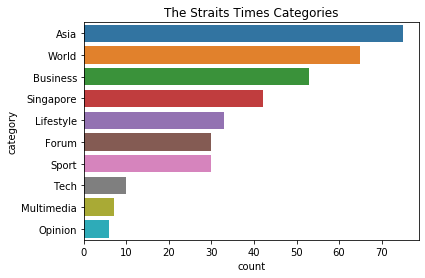

In [14]:
sns.countplot(y='category',data=straitsTimesProcessed,order=straitsTimesProcessed['category'].value_counts().iloc[:10].index).set_title("The Straits Times Categories") 

Text(0.5, 1.0, 'The Straits Times Sub Categories')

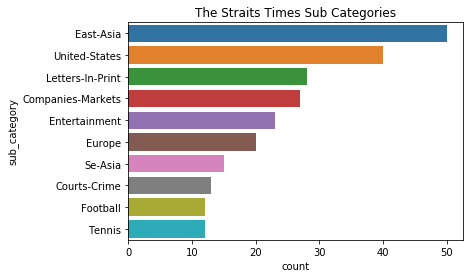

In [15]:
sns.countplot(y='sub_category',data=straitsTimesProcessed,order=straitsTimesProcessed['sub_category'].value_counts().iloc[:10].index).set_title("The Straits Times Sub Categories") 

### Asia One

Text(0.5, 1.0, 'Asia One Categories')

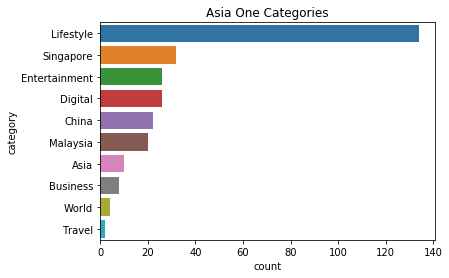

In [16]:
sns.countplot(y='category',data=asiaOneProcessed,order=asiaOneProcessed['category'].value_counts().iloc[:10].index).set_title("Asia One Categories") 

### Channel News Asia

Text(0.5, 1.0, 'Channel News Asia Categories')

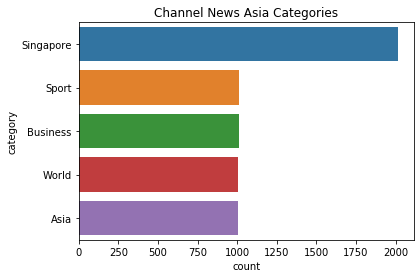

In [17]:
sns.countplot(y='category',data=cnaProcessed,order=cnaProcessed['category'].value_counts().iloc[:10].index).set_title("Channel News Asia Categories") 

### The New Paper

Text(0.5, 1.0, 'The New Paper Categories')

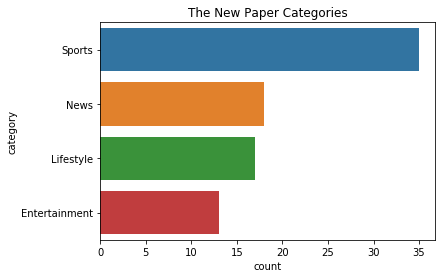

In [18]:
sns.countplot(y='category',data=theNewPaperProcessed,order=theNewPaperProcessed['category'].value_counts().iloc[:10].index).set_title("The New Paper Categories") 

Text(0.5, 1.0, 'The New Paper Sub Categories')

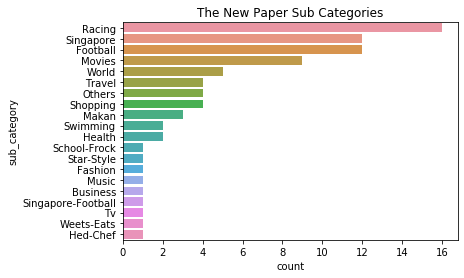

In [19]:
sns.countplot(y='sub_category',data=theNewPaperProcessed,order=theNewPaperProcessed['sub_category'].value_counts().iloc[:20].index).set_title("The New Paper Sub Categories") 

# Classification Categories

6 Main news categories were identified from the Data Exploration across the different news wesbites. The 6 categories identified were: International News, Singapore (Local) News, Business News, Sports, Technology and Lifestyle. In order to align all categories across the 4 different news sites, mapping was performed. 

## Straits Times Mapping

In [20]:
straitsTimesProcessed['category'].unique()

array(['Singapore', 'Sport', 'Lifestyle', 'Asia', 'World', 'Multimedia',
       'Opinion', 'Business', 'Tech', 'Forum'], dtype=object)

In [21]:
#Straits Times
straits_times_mapping= {
    'Asia': 'World',
    'China': 'World',
    'Malaysia': 'World',
    'Travel': 'Lifestyle',
    'Tech': 'Technology',
    'Sport': 'Sports',
    'Entertainment': 'Lifestyle'
}

Text(0.5, 1.0, 'Categories')

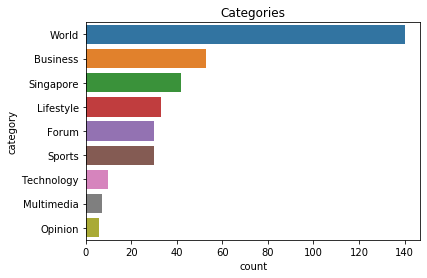

In [22]:
straitsTimesProcessed = straitsTimesProcessed.replace({'category':straits_times_mapping})
sns.countplot(y='category',data=straitsTimesProcessed,order=straitsTimesProcessed['category'].value_counts().iloc[:10].index).set_title("Categories") 

In [23]:
straitsTimesProcessed['category'].unique()

array(['Singapore', 'Sports', 'Lifestyle', 'World', 'Multimedia',
       'Opinion', 'Business', 'Technology', 'Forum'], dtype=object)

## Asia One Mapping

In [24]:
asiaOneProcessed['category'].unique()

array(['Singapore', 'Digital', 'Entertainment', 'Lifestyle', 'Malaysia',
       'China', 'Asia', 'World', 'Travel', 'Business'], dtype=object)

In [25]:
#Asia One
asiaone_mapping= {
    'Asia': 'World',
    'China': 'World',
    'Malaysia': 'World',
    'Travel': 'Lifestyle',
    'Digital': 'Technology',
    'Entertainment': 'Lifestyle'
}

Text(0.5, 1.0, 'Categories')

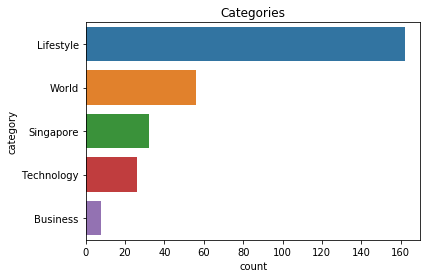

In [26]:
asiaOneProcessed = asiaOneProcessed.replace({'category':asiaone_mapping})
sns.countplot(y='category',data=asiaOneProcessed,order=asiaOneProcessed['category'].value_counts().iloc[:10].index).set_title("Categories") 

In [27]:
asiaOneProcessed['category'].unique()

array(['Singapore', 'Technology', 'Lifestyle', 'World', 'Business'],
      dtype=object)

## Channel News Asia Mapping

In [28]:
cnaProcessed['category'].unique()

array(['Asia', 'Business', 'Singapore', 'Sport', 'World'], dtype=object)

In [29]:
#Channel News Asia
channelnewsasia_mapping= {
    'Sport': 'Sports',
    'Asia': 'World'
}

Text(0.5, 1.0, 'Categories')

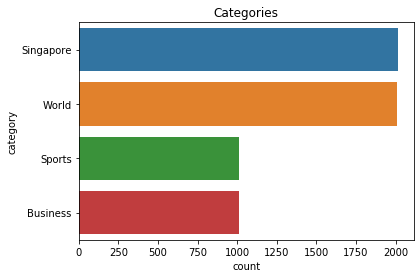

In [30]:
cnaProcessed = cnaProcessed.replace({'category':channelnewsasia_mapping})
sns.countplot(y='category',data=cnaProcessed,order=cnaProcessed['category'].value_counts().iloc[:10].index).set_title("Categories") 

In [31]:
cnaProcessed['category'].unique()

array(['World', 'Business', 'Singapore', 'Sports'], dtype=object)

## The New Paper Mapping

In [32]:
theNewPaperProcessed['category'].unique()

array(['News', 'Sports', 'Entertainment', 'Lifestyle'], dtype=object)

Text(0.5, 1.0, "The New Paper 'News' Categories")

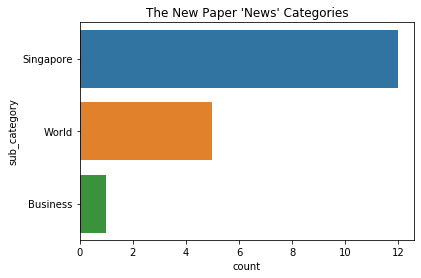

In [33]:
theNewPaper_News = theNewPaperProcessed[theNewPaperProcessed['category']=='News']
sns.countplot(y='sub_category',data=theNewPaper_News,order=theNewPaper_News['sub_category'].value_counts().iloc[:10].index).set_title("The New Paper 'News' Categories") 

In [34]:
def tnp_replace_news_categories(category,sub_category): 
    try:
        if category=='News':
            return sub_category
        else:
            return category
    except:
        print('Error')

In [35]:
theNewPaperProcessed["revised_categories"] = theNewPaperProcessed.apply(lambda x: tnp_replace_news_categories(x["category"],x["sub_category"]), axis=1)

In [36]:
theNewPaperProcessed['revised_categories'].unique()

array(['Singapore', 'World', 'Business', 'Sports', 'Entertainment',
       'Lifestyle'], dtype=object)

In [37]:
#The New Paper
thenewpaper_mapping= {
    'Entertainment': 'Lifestyle'
}

Text(0.5, 1.0, 'Revised Categories')

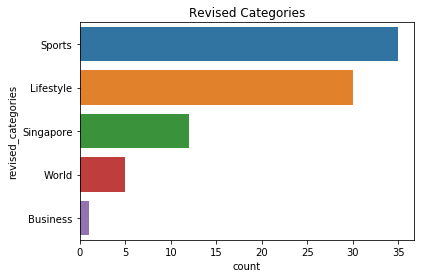

In [38]:
theNewPaperProcessed = theNewPaperProcessed.replace({'revised_categories':thenewpaper_mapping})
sns.countplot(y='revised_categories',data=theNewPaperProcessed,order=theNewPaperProcessed['revised_categories'].value_counts().iloc[:10].index).set_title("Revised Categories") 

In [39]:
theNewPaperProcessed.drop('category', axis=1, inplace=True)
theNewPaperProcessed = theNewPaperProcessed.rename(columns={'revised_categories': 'category'})
theNewPaperProcessed['category'].unique()

array(['Singapore', 'World', 'Business', 'Sports', 'Lifestyle'],
      dtype=object)

# Concatenate all DataFrames

In [40]:
list_of_sources = [straitsTimesProcessed, asiaOneProcessed,cnaProcessed,theNewPaperProcessed]
all_articles = pd.concat(list_of_sources)
all_articles.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,File,Unnamed: 0,Unnamed: 0.1,article,author,category,date,link,premium,source,sub_category,title,topics,0,2,3
0,08122019195416.xlsx,7.0,0.0,SINGAPORE - A man's body was found on the grou...,['Malavika Menon'],Singapore,Published2 min ago,http://www.straitstimes.com/singapore/body-fou...,False,The Straits Times,NaN,Body found in garbage chute area of Woodlands ...,"['POLICE', 'HDB']",NaN,NaN,NaN
1,08122019195547.xlsx,8.0,0.0,London (AFP) - Thai Formula One driver Alexand...,[],Sports,Published2 min ago,https://www.straitstimes.com/sport/formula-one...,False,The Straits Times,Formula-One,Formula One: Thai Alexander Albon given chance...,"['THAILAND', 'GRAND PRIX', 'ALEXANDER ALBON']",NaN,NaN,NaN
2,08122019195820.xlsx,9.0,0.0,SINGAPORE - The Straits Times bagged eight awa...,['Lydia Lam'],Singapore,"PublishedNov 1, 2017, 6:26 pm SGT",https://www.straitstimes.com/singapore/the-str...,False,The Straits Times,NaN,The Straits Times bags 8 wins at Asian Digital...,"['SINGAPORE PRESS HOLDINGS', 'AWARDS AND PRIZE...",NaN,NaN,NaN
3,08122019195820.xlsx,10.0,0.0,Ready for a challenge? Try out daily Sudoku an...,[],Lifestyle,"PublishedAug 8, 2018, 4:00 am SGT",https://www.straitstimes.com/lifestyle/play-su...,False,The Straits Times,NaN,Games,['ST GAMES'],NaN,NaN,NaN
4,08122019195820.xlsx,11.0,0.0,HONG KONG (BLOOMBERG) – Hong Kong airport auth...,[],World,Published10 hours ago,https://www.straitstimes.com/asia/east-asia/fl...,False,The Straits Times,East-Asia,Hong Kong cancels all remaining Monday flights...,"['HONG KONG PROTESTS', 'CHINA', 'POLICE']",NaN,NaN,NaN


# Output Data

In [41]:
subset_articles = all_articles[['source','title','article','category']]
subset_articles.head()

,source,title,article,category
0,The Straits Times,Body found in garbage chute area of Woodlands ...,SINGAPORE - A man's body was found on the grou...,Singapore
1,The Straits Times,Formula One: Thai Alexander Albon given chance...,London (AFP) - Thai Formula One driver Alexand...,Sports
2,The Straits Times,The Straits Times bags 8 wins at Asian Digital...,SINGAPORE - The Straits Times bagged eight awa...,Singapore
3,The Straits Times,Games,Ready for a challenge? Try out daily Sudoku an...,Lifestyle
4,The Straits Times,Hong Kong cancels all remaining Monday flights...,HONG KONG (BLOOMBERG) – Hong Kong airport auth...,World


In [42]:
subset_articles['category'].unique()

array(['Singapore', 'Sports', 'Lifestyle', 'World', 'Multimedia',
       'Opinion', 'Business', 'Technology', 'Forum'], dtype=object)

In [43]:
len(subset_articles)

6760

## Filter only to articles which fall into the 6 Categories

In [44]:
identified_categories = ['Singapore', 'Sports', 'Lifestyle', 'World', 'Business', 'Technology']

In [45]:
relevant_articles = subset_articles[subset_articles['category'].isin(identified_categories)]
relevant_articles['category'].unique()

array(['Singapore', 'Sports', 'Lifestyle', 'World', 'Business',
       'Technology'], dtype=object)

In [46]:
len(relevant_articles)

6717

In [47]:
#Export to Serialized Object
with open('Pickles/all_articles_raw.pickle', 'wb') as output:
    pickle.dump(relevant_articles, output)